## 1. Configuraciones iniciales.

In [2]:
#a. Constantes.
mes_train = [202101,202102,202103,202104]
mes_test = 202106

dataset_path = '../../../datasets/'
modelos_path = '../../../modelos/'
db_path = '../../../db/'
dataset_file = 'competencia_01.csv'

ganancia_acierto = 273000
costo_estimulo = 7000

mes_train = 202102
mes_test = 202104

semillas = [211777, 174989, 131497, 612223, 234803]

In [3]:
#b. Librerías.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#c. Lectura.
data = pd.read_csv(dataset_path + dataset_file)

## 2. EDA.

#### A. Análisis Univariado.

##### 1. ctrx_quarter

**¿Qué significa esta variable?**

Cantidad de movimientos voluntarios en las cuentas bancarias 
      \n(no tarjeta de credito) que el cliente realizó en los ultimos 90 dias.

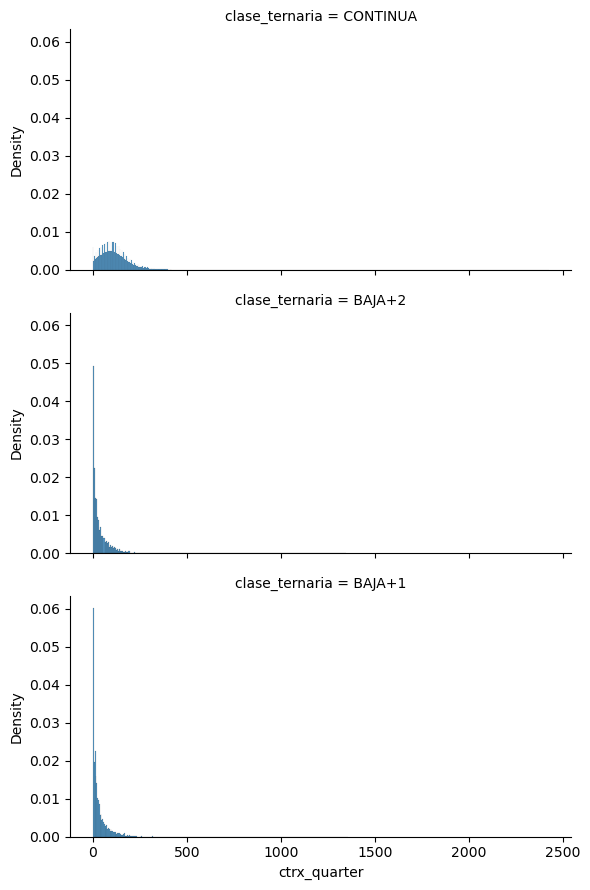

In [10]:
# Grafico.
g = sns.FacetGrid(data, row="clase_ternaria", height=3, aspect=2)
g.map(sns.histplot, "ctrx_quarter", stat='density')

In [ ]:
print('''Se puede ver como la cantidad de movimientos bancarios de los clientes en los últimos 90 días
      nos permite separar claramente los "CONTINUA" respecto a los que se dan de BAJA.
      Donde, los que se dan de baja suelen hacer pocos movimientos (especialmente los de BAJA+2). Aunque
      hay algunos casos de BAJA+1 que hicieron mayores movimientos que "BAJA+2" e, incluso, 
      que "CONTINUA". ¿Será por una necesidad en especial que se dan de alta, hacen muchos 
      movimientos y, luego, se dan de baja? Quizás eso caracteríza a un sector del "BAJA+1" que no habría que atacar.
      Con respecto a los "CONTINUA" podemos pensar que suelen concentrarse en un valor más
      "normal" de transacciones, con menor dispersión que en los demás casos.''')

##### 2. mcuentas_saldo

**¿Qué significa esta variable?**
Saldo total de TODAS las cuentas del cliente

In [ ]:
# Grafico.
#sns.boxplot(x='clase_ternaria', y='mcuentas_saldo', data=data)

In [ ]:
# Grafico.
lower_bound = data['mcuentas_saldo'].quantile(0.10)
upper_bound = data['mcuentas_saldo'].quantile(0.90)

filtered_data = data[(data['mcuentas_saldo'] >= lower_bound) & (data['mcuentas_saldo'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='mcuentas_saldo', data=filtered_data)

In [ ]:
print('''Se puede ver como el saldo en las cuentas de los clientes en claramente mayor en "CONTINUA".
      En segundo lugar, se encuentran los de "BAJA+2" y, por ultimo, "BAJA+1", lo cual tiene sentido
      en tanto están cerrando/migrando sus activos en el presente banco.
      Cabe destacar el sesgo hacia la izquierda en todas las clases, lo que nos habla de una pequeña
      porción en cada una de ellas, que concentra mucho saldo.''')

##### 3. mprestamos_personales

**¿Qué significa esta variable?**
Monto total de la deuda restante de todos los préstamos personales del cliente.

In [ ]:
# Grafico.
sns.boxplot(x='clase_ternaria', y='mprestamos_personales', data=data)

In [ ]:
# Grafico.
lower_bound = data['mprestamos_personales'].quantile(0.20)
upper_bound = data['mprestamos_personales'].quantile(0.80)

filtered_data = data[(data['mprestamos_personales'] >= lower_bound) & (data['mprestamos_personales'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='mprestamos_personales', data=filtered_data)

In [ ]:
# Grafico.
lower_bound = data['mprestamos_personales'].quantile(0.25)
upper_bound = data['mprestamos_personales'].quantile(0.75)

filtered_data = data[(data['mprestamos_personales'] >= lower_bound) & (data['mprestamos_personales'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='mprestamos_personales', data=filtered_data)

In [ ]:
print('''
      Hay pocos con  deuda por préstamos (la mayoría = 0). Esta tendencia en pareja en todas las clases, 
      aunque en "CONTINUA" hay mayor número de ejemplares (porque son más también). Entonces ,¿Cómo separa 
      entre clases?
      ''')

In [ ]:
# Grafico.
g = sns.FacetGrid(data, row="clase_ternaria", height=3, aspect=2)
g.map(sns.histplot, "mprestamos_personales", stat='density')

In [ ]:
print('''
      Los "BAJA+2" no deben plata por préstamos.
      Los "BAJA+1" un 30 porciento si.
      Los "CONTINUA" un 60 porciento si.
      Lo cual nos hace pensar que, a cuanto menos debes, más chances de salida.
      Ahora bien, ¿Cómo se encuadra esto con respecto a los BAJA+2? Si
      fuesen una continuidad temporal respecto a los "BAJA+1" deberían estar en el medio de deuda entre las
      otras dos clases. O la mayoría son "nuevos que se van al mes siguiente"? Chequear eso...''')

##### 4. cdescubierto_preacordado

**¿Qué significa esta variable?**
Si tiene un acuerdo de descubierto.

In [ ]:
# Grafico.
tabla_contingencia = pd.crosstab(data['cdescubierto_preacordado'], data['clase_ternaria'], margins=True, margins_name="Total")
tabla_porcentajes_filas = tabla_contingencia.div(tabla_contingencia.loc["Total", "Total"], axis=1) * 100
tabla_porcentajes_columnas = tabla_contingencia.div(tabla_contingencia.loc["Total"], axis=1) * 100
tabla_porcentajes_columnas = tabla_porcentajes_columnas.drop(index="Total")

tabla_contingencia

In [ ]:
tabla_porcentajes_filas

In [ ]:
tabla_porcentajes_columnas

In [ ]:
print('''
      La mayoría lo tiene. Ahora bien, dentro de cada clase...
      "CONTINUA" es el de mayor tenencia de dicho producto bancario (96%).
      "BAJA+2" lo sigue, con un descenso drástico (86%).
      "BAJA+1" tiene 81%, un gran descenso.
      Se puede pensar como transición temporal entre "BAJA+2" a "BAJA+1", o como dos tipos
      de clientes distintos, donde el "nuevo cliente" que es "BAJA+1" no saca un descubierto.
      ''')

##### 5. Visa_status.

**¿Qué significa esta variable?**

{ 0,  6, 7, 9 } indica el estado de la cuenta de la tarjeta de crédito. 
      0 abierta,  6 en proceso de cierre, 7 en proceso avanzado de cierre, 9 cuenta cerrada. 
      Una cuenta cerrada puede volver a abrirse !!

In [ ]:
# Grafico.
tabla_contingencia = pd.crosstab(data['Visa_status'], data['clase_ternaria'], margins=True, margins_name="Total")
tabla_porcentajes_filas = tabla_contingencia.div(tabla_contingencia.loc["Total", "Total"], axis=1) * 100
tabla_porcentajes_columnas = tabla_contingencia.div(tabla_contingencia.loc["Total"], axis=1) * 100
tabla_porcentajes_columnas = tabla_porcentajes_columnas.drop(index="Total")

tabla_contingencia

In [ ]:
tabla_porcentajes_filas

In [ ]:
tabla_porcentajes_columnas

In [ ]:
# Conclusiones.
print('''
      "CONTINUA" está muy concentrado en visa_status = 0, osea, abierta.
      "BAJA+2" también, pero se incrementan los demás valores, especialmente el =7, 7 en proceso avanzado de cierre.
      "BAJA+1" no solo tiene fuertes valores en los procesos iniciales y avanzados de cierre. Sino que en Cuenta cerrada.
      Aún así, aunque esto es un diferencial, es notable la gran concentración de "cuentas abiertas" en todos los casos.
      Si bien hay un diferencial entre los procesos de cierre, BAJA+1 y BAJA+2 se parecen mucho entre sí. Quizás la diferencia
      está en el estadío de comienzo de trámite para cerrar la cuenta bancaria. Tratando de atajar a aquellos que están inicializando/avanzados en 
      el proceso de cierre. Como cruzan las cuentas abiertas con el saldo dentro de ellas?
      ''')

##### 6. cproductos

**¿Qué significa esta variable?**
Cantidad de productos que el cliente posee con el banco. Se cuentan las familias de productos.

In [ ]:
# Grafico.
tabla_contingencia = pd.crosstab(data['cproductos'], data['clase_ternaria'], margins=True, margins_name="Total")
tabla_porcentajes_filas = tabla_contingencia.div(tabla_contingencia.loc["Total", "Total"], axis=1) * 100
tabla_porcentajes_columnas = tabla_contingencia.div(tabla_contingencia.loc["Total"], axis=1) * 100
tabla_porcentajes_columnas = tabla_porcentajes_columnas.drop(index="Total")

tabla_contingencia

In [ ]:
tabla_porcentajes_filas

In [ ]:
tabla_porcentajes_columnas

In [ ]:
# Grafico.
g = sns.FacetGrid(data, row="clase_ternaria", height=3, aspect=2)
g.map(sns.histplot, "cproductos", stat='density',bins=10)

In [ ]:
print('''
      Todas las clases suelen tener un sesgo a la izquierda, especialmente "BAJA+1", seguido por "BAJA+2".
      Aun así, es interesante la cantidad de personas que tienen muchas familias de productos, en todas las clases.
      ''')

##### 7. mcomisiones_otras

**¿Qué significa esta variable?**
Monto total en pesos de otras comisiones que se cobraron al cliente durante el mes.

In [ ]:
# Grafico.
sns.boxplot(x='clase_ternaria', y='mcomisiones_otras', data=data)

In [ ]:
# Grafico.
lower_bound = data['mcomisiones_otras'].quantile(0.20)
upper_bound = data['mcomisiones_otras'].quantile(0.80)

filtered_data = data[(data['mcomisiones_otras'] >= lower_bound) & (data['mcomisiones_otras'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='mcomisiones_otras', data=filtered_data)

In [ ]:
print('''
      Los clientes de "BAJA+1" y "BAJA+2" tienen mayores comisiones cobradas. De hecho, 
      los de "CONTINUA" hasta tiene outliers en valores negativos... ¿Qué otras comisiones serán?
      ''')

##### 8. mcaja_ahorro
**¿Qué significa esta variable?**
Monto total de la caja de ahorro del Paquete Premium

In [ ]:
# Grafico.
g = sns.FacetGrid(data, row="clase_ternaria", height=3, aspect=2)
g.map(sns.histplot, "mcaja_ahorro", stat='density',bins=20)

In [ ]:
# Grafico.
sns.boxplot(x='clase_ternaria', y='mcaja_ahorro', data=data)

In [ ]:
# Grafico.
lower_bound = data['mcaja_ahorro'].quantile(0.10)
upper_bound = data['mcaja_ahorro'].quantile(0.90)
filtered_data = data[(data['mcaja_ahorro'] >= lower_bound) & (data['mcaja_ahorro'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='mcaja_ahorro', data=filtered_data)

In [ ]:
print('''
      La caja de ahorro está principalmente definida en rangos chicos, exceptuando por algunos outliers.
      Si vamos a la distribución sin outliers, veremos un sesgo hacia la izquierda de todas las clases, especialmente
      en los "BAJA+2" y "BAJA+1", donde estos últimos parecen tener un poco de menos saldo en su caja de ahorros.
      ''')

##### 9. mpasivos_margen

**¿Qué significa esta variable?**
Monto total de la ganancia que el banco ha obtenido por el 
      dinero/inversiones que el cliente tiene en el banco.

In [ ]:
# Grafico.
sns.boxplot(x='clase_ternaria', y='mpasivos_margen', data=data)

In [ ]:
# Grafico.
lower_bound = data['mpasivos_margen'].quantile(0.05)
upper_bound = data['mpasivos_margen'].quantile(0.95)

filtered_data = data[(data['mpasivos_margen'] >= lower_bound) & (data['mpasivos_margen'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='mpasivos_margen', data=filtered_data)

In [ ]:
print('''
      Podemos ver como, la distribución del "CONTINUA" es significativamente distinta respecto a las
      otras dos clases, dejando mucho mayor margen. Dentro de ellos, se destacan aquella pequeña porción (la mediana está
      corrida a la izquierda), que deja mucho mayor margen que el resto.
      Con respecto a quienes se dan de baja, si bien tiene distribuciones parecidas (y aquí también hay
      distribuciones con sesgo a la izquierda), los "BAJA+1" parecen dejar menor margen que los "BAJA+2".
      Esto puede tener que ver con el tipo de inversor que es cada uno (más arriesgado/menos arriesgado) y/o
      por la cantidad de $ que cada uno tiene en el banco. Cruzar con otras variables?
      ''')

In [ ]:
print('''Estaría bueno investigar cuantos "BAJA+1" son "nuevos y se dan de baja al mes siguiente", 
      y cuantos vienen de mayor tiempo hacia atrás. Mi hipótesis es que muchos se abren una cuenta
      solo por un mes, sacan un solo producto (tienen menos cantidad de productos que los demás), y luego la cierran. Estos casos, habría que sacarlos del análisis o hacerles
      una nueva "subcategoría" con la "antigüedad". Y así ver mejor, el comportamiento entre
      "BAJA+1" vs "BAJA+2".''')

In [ ]:
print('''-----> Crear una columna con cantidad de productos.
      -----> Cruzar las distintas variables con antigüedad del cliente''')

##### 10. cpayroll_trx

**¿Qué significa esta variable?**
Cantidad de Acreditaciones de Haberes en relación de depencia que le hicieron al cliente en ese mes.  Un cliente puede estar en relacion de dependencia con mas de una empresa. Una empresa puede hacerle VARIOS depósitos al mismo empleado durante el mes.  Soalmente se consideran las acreditaciones de empresas que tienen un contrato con el banco.

In [ ]:
# Grafico.
g = sns.FacetGrid(data, row="clase_ternaria", height=3, aspect=2)
g.map(sns.histplot, "cpayroll_trx", stat='density',bins=5)

In [ ]:
# Grafico.
sns.boxplot(x='clase_ternaria', y='cpayroll_trx', data=data)

In [ ]:
# Grafico.
lower_bound = data['cpayroll_trx'].quantile(0.10)
upper_bound = data['cpayroll_trx'].quantile(0.90)
filtered_data = data[(data['cpayroll_trx'] >= lower_bound) & (data['cpayroll_trx'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='cpayroll_trx', data=filtered_data)

In [ ]:
print('''
      Los "CONTINUA" suelen tener 1 o 2 acreditaciones en el mes (la empresa le deposita allí).
      Mientras que "BAJA+1" y "BAJA+2" parecen coincidir en que casi no tuvieron depósitos de haberes allí. Con
      algunas excepciones". Luego renunciaron/echaron? Quizás tratar de armar un prototipo de empleado.
      ''')

##### 11. active_quarter.

**¿Qué significa?** Indica si el cliente ha realizado transacciones voluntarias en el ultimo timestre . Que el banco cobre la comisión de mantenimiento de cuenta NO es un movimiento voluntario por mas que es un debito en la cuenta.  Que se cobre una cuota de una compra con tarjeta de crédito, tampoco es un movimiento voluntario.

In [ ]:
# Grafico.
g = sns.FacetGrid(data, row="clase_ternaria", height=3, aspect=2)
g.map(sns.histplot, "active_quarter", stat='density')

In [16]:
cantidad_con_mov = len(data[(data["clase_ternaria"] == "BAJA+2")&(data["ctrx_quarter"] >0)])
cantidad_con_transacciones =data[data["clase_ternaria"] == "BAJA+2"]["active_quarter"].value_counts()[1]
print("Del total de {} 'BAJA+2' con movimientos, {} hicieron por lo menos transacciones".format(cantidad_con_mov,cantidad_con_transacciones))

Del total de 3330 'BAJA+2' con movimientos, 3218 hicieron por lo menos transacciones


In [ ]:
print('''
      Claramente, "CONTINUA" realizó movimientos voluntarios más allá de algún cobro del banco 
      en el último trimestre. En cambio, los que se dan de BAJA, hay una parte que sí, 
      pero la mayoría ni realizó transacciones en el último trimestre.
      ''')

##### 12. mcuenta_corriente.

**¿Qué significa?** Monto total de las cuenta corriente del paquete premium.

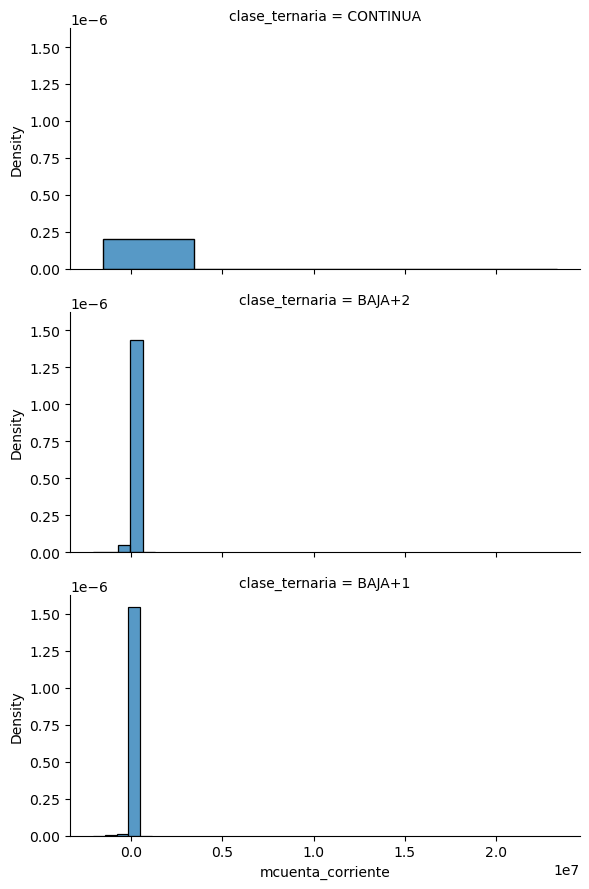

In [17]:
# Grafico.
g = sns.FacetGrid(data, row="clase_ternaria", height=3, aspect=2)
g.map(sns.histplot, "mcuenta_corriente", stat='density',bins=5)

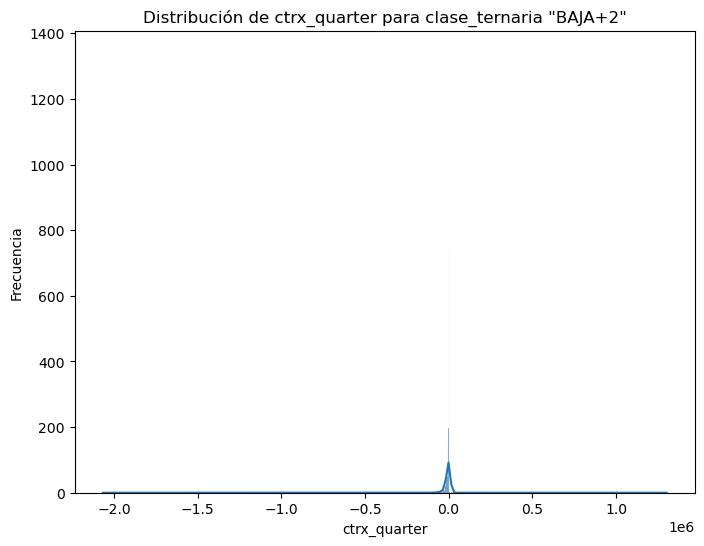

In [19]:
# Grafico.
data_baja2 = data[data["clase_ternaria"] == "BAJA+2"]["mcuenta_corriente"]
plt.figure(figsize=(8,6))
sns.histplot(data_baja2, kde=True)  # kde=True para agregar una curva de densidad
plt.title('Distribución de ctrx_quarter para clase_ternaria "BAJA+2"')
plt.xlabel('ctrx_quarter')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Grafico.
sns.boxplot(x='clase_ternaria', y='mcuenta_corriente', data=data)

In [ ]:
# Grafico.
lower_bound = data['mcuenta_corriente'].quantile(0.30)
upper_bound = data['mcuenta_corriente'].quantile(0.70)
filtered_data = data[(data['mcuenta_corriente'] >= lower_bound) & (data['mcuenta_corriente'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='mcuenta_corriente', data=filtered_data)

In [ ]:
print('''
      Los valores son muy cercanos a 0 en todas las clases. Aunque los de "CONTINUA" tienen mayor outliers
      por arriba. Mientras tanto, los "BAJA" se ven con saldos más negativos.
      ''')

##### 13. mtarjeta_visa_consumo.

**¿Qué significa?** Monto total de los consumos efectuados durante el mes con la tarjeta de crédito VISA.

<Axes: xlabel='clase_ternaria', ylabel='mtarjeta_visa_consumo'>

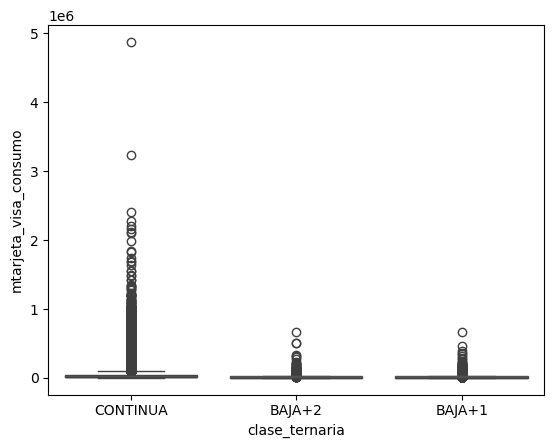

In [20]:
# Grafico.
sns.boxplot(x='clase_ternaria', y='mtarjeta_visa_consumo', data=data)
# Grafico.
lower_bound = data['mtarjeta_visa_consumo'].quantile(0.40)
upper_bound = data['mtarjeta_visa_consumo'].quantile(0.60)
filtered_data = data[(data['mtarjeta_visa_consumo'] >= lower_bound) & (data['mtarjeta_visa_consumo'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='mtarjeta_visa_consumo', data=filtered_data)

In [ ]:
print('''
      Nuevamente, se ven muchos valores outliers que marcarían perfiles distintos a la mayoría.
      De todas formas, se diferencia como los "CONTINUA" realizan mayor cantidad de consumos
      con la tarjeta.
      ''')

##### 14. mrentabilidad_annual.

**¿Qué significa?** Ganancia total que el banco ha obtenido de ese cliente en el ultimo año de relacion cliente-banco,  o meses desde que ingresó si es cliente reciente.

<Axes: xlabel='clase_ternaria', ylabel='mrentabilidad_annual'>

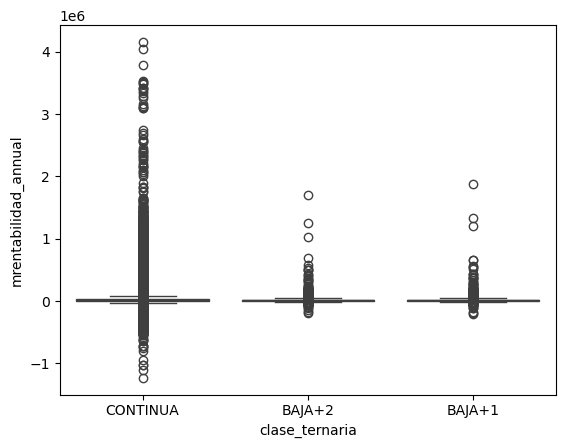

In [21]:
# Grafico.
sns.boxplot(x='clase_ternaria', y='mrentabilidad_annual', data=data)

In [ ]:
# Grafico.
lower_bound = data['mrentabilidad_annual'].quantile(0.05)
upper_bound = data['mrentabilidad_annual'].quantile(0.95)

filtered_data = data[(data['mrentabilidad_annual'] >= lower_bound) & (data['mrentabilidad_annual'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='mrentabilidad_annual', data=filtered_data)

In [ ]:
print('''
      Los que se dan de BAJA, son clientes que claramente dejan menor ganancias en comparación con los "CONTINUA".
      Nuevamente, se diferencian los outliers, que nos estarían hablando de un comportamiento distinto.
      ''')

##### 15. cprestamos_personales.
**¿Qué significa?** Cantidad de préstamos personales vigentes  del cliente

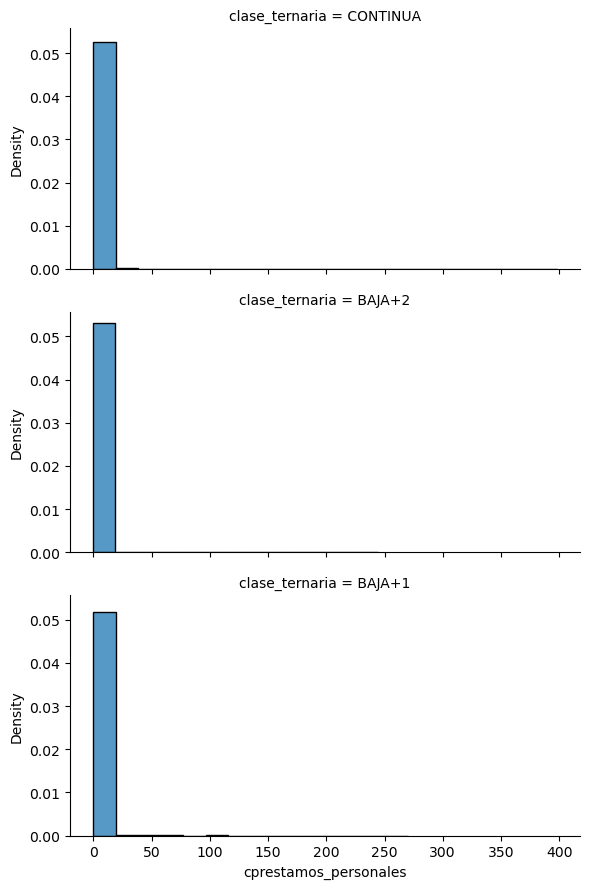

In [22]:
# Grafico.
g = sns.FacetGrid(data, row="clase_ternaria", height=3, aspect=2)
g.map(sns.histplot, "cprestamos_personales", stat='density')#,bins=5)

<Axes: xlabel='clase_ternaria', ylabel='cprestamos_personales'>

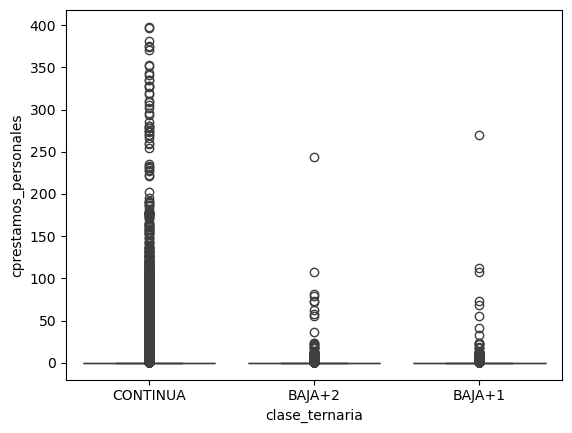

In [24]:
sns.boxplot(x='clase_ternaria', y='cprestamos_personales', data=data)

<Axes: xlabel='clase_ternaria', ylabel='cprestamos_personales'>

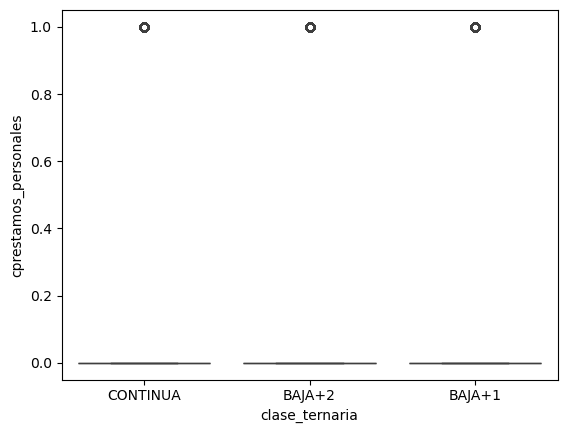

In [23]:
# Grafico.
lower_bound = data['cprestamos_personales'].quantile(0.20)
upper_bound = data['cprestamos_personales'].quantile(0.80)

filtered_data = data[(data['cprestamos_personales'] >= lower_bound) & (data['cprestamos_personales'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='cprestamos_personales', data=filtered_data)

In [ ]:
print('''En todas las clases, los préstamos personales suelen ser = 0.
      Ahora bien, hay muchos outliers con valores muy grandes. Especialmente, los
      "CONTINUA" suelen pedir números muy grandes
      ''')

##### 16. ctarjeta_visa_transacciones.
**¿Qué significa?** Cantidad de transacciones efectuadas durante el mes con la tarjeta de crédito VISA.

In [ ]:
# Grafico.
sns.boxplot(x='clase_ternaria', y='ctarjeta_visa_transacciones', data=data)

<Axes: xlabel='clase_ternaria', ylabel='ctarjeta_visa_transacciones'>

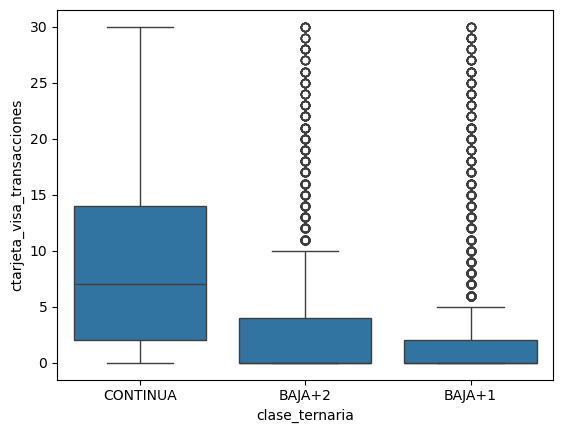

In [25]:
# Grafico.
lower_bound = data['ctarjeta_visa_transacciones'].quantile(0.10)
upper_bound = data['ctarjeta_visa_transacciones'].quantile(0.90)

filtered_data = data[(data['ctarjeta_visa_transacciones'] >= lower_bound) & (data['ctarjeta_visa_transacciones'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='ctarjeta_visa_transacciones', data=filtered_data)

In [ ]:
print('''
      Se puede ver como a cuanto más lejos de irte, más transacciones realizas. Y viceversa.
      ''')

##### 17. Master_Fvencimiento.
**¿Qué significa?** Dias para el vencimiento del plastico de la tarjeta de crédito, contados a la fecha de la foto.

In [ ]:
# Grafico.
sns.boxplot(x='clase_ternaria', y='Master_Fvencimiento', data=data)

<Axes: xlabel='clase_ternaria', ylabel='Master_Fvencimiento'>

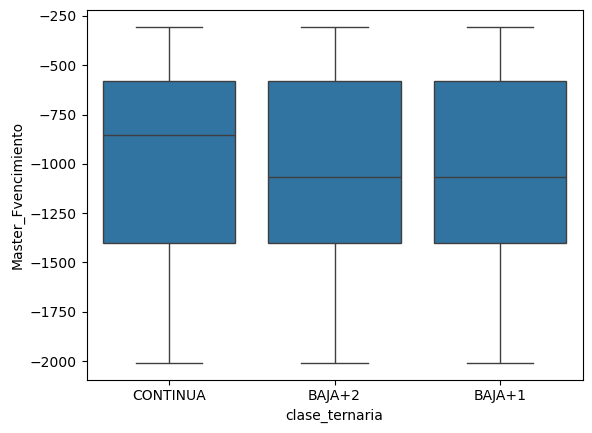

In [26]:
# Grafico.
lower_bound = data['Master_Fvencimiento'].quantile(0.10)
upper_bound = data['Master_Fvencimiento'].quantile(0.90)

filtered_data = data[(data['Master_Fvencimiento'] >= lower_bound) & (data['Master_Fvencimiento'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='Master_Fvencimiento', data=filtered_data)

In [ ]:
print('''
      Las tres clases tienen una distribución parecida, excepto porque "CONTINUA" tiene
      un sesgo más hacia la derecha (está más próxima a vencer). Mientras que las "BAJA" parecen
      estar más lejos de vencer... Habla de clientes más nuevos?
      ''')

##### 18. Visa_msaldopesos.
**¿Qué significa?** Saldo total el pesos de la tarjeta, para ese mes.

In [ ]:
# Grafico.
sns.boxplot(x='clase_ternaria', y='Visa_msaldopesos', data=data)

<Axes: xlabel='clase_ternaria', ylabel='Visa_msaldopesos'>

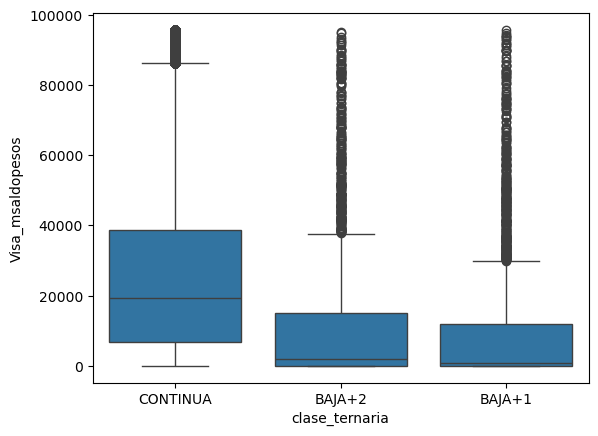

In [27]:
# Grafico.
lower_bound = data['Visa_msaldopesos'].quantile(0.10)
upper_bound = data['Visa_msaldopesos'].quantile(0.90)

filtered_data = data[(data['Visa_msaldopesos'] >= lower_bound) & (data['Visa_msaldopesos'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='Visa_msaldopesos', data=filtered_data)

In [ ]:
print('''
      Claramente, "CONTINUA" presenta mayor cantidad de saldo en pesos. Por otro lado, 
      cuanto más cerca de irse, menos saldo se tiene.
      ''')

##### 19. mactivos_margen.
**¿Qué significa?** Monto total de la ganancia que el banco ha obtenido en concepto de intereses que ha cobrado al cliente.

In [ ]:
sns.boxplot(x='clase_ternaria', y='mactivos_margen', data=data)

<Axes: xlabel='clase_ternaria', ylabel='mactivos_margen'>

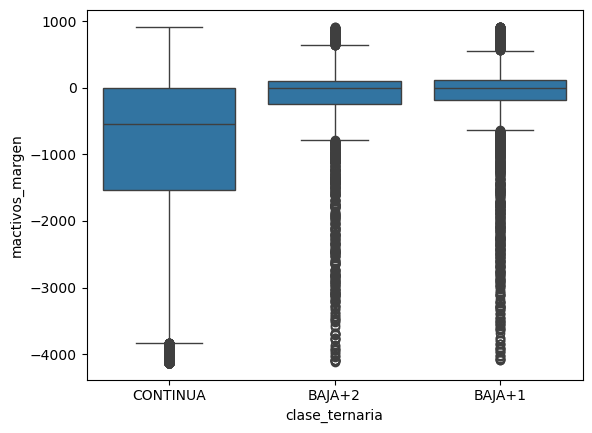

In [28]:
# Grafico.
lower_bound = data['mactivos_margen'].quantile(0.10)
upper_bound = data['mactivos_margen'].quantile(0.90)

filtered_data = data[(data['mactivos_margen'] >= lower_bound) & (data['mactivos_margen'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='mactivos_margen', data=filtered_data)

In [ ]:
print('''
      No entiendo que significa el saldo positivo y el negativo en este variable.
      ''')

##### 20. mpayroll.
**¿Qué significa?** Monto total que le acreditaron los empleadores “acreditados”  al cliente durante el mes.

<Axes: xlabel='clase_ternaria', ylabel='mpayroll'>

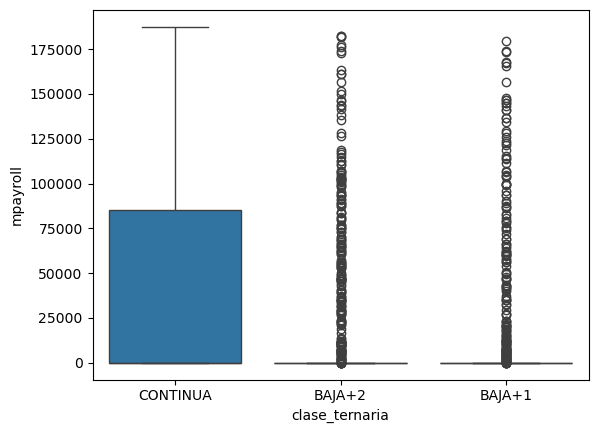

In [29]:
# Grafico.
lower_bound = data['mpayroll'].quantile(0.10)
upper_bound = data['mpayroll'].quantile(0.90)

filtered_data = data[(data['mpayroll'] >= lower_bound) & (data['mpayroll'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='mpayroll', data=filtered_data)

In [ ]:
print('''
      Claramente, los "CONTINUA" recibieron mayor parte. Por su lado, los "BAJA" se distribuyen cerca del 0, 
      con excepciones (outliers).
      ''')

##### 21. Visa_msaldototal.
**¿Qué significa?** Saldo total de la tarjeta, para ese mes.

<Axes: xlabel='clase_ternaria', ylabel='Visa_msaldototal'>

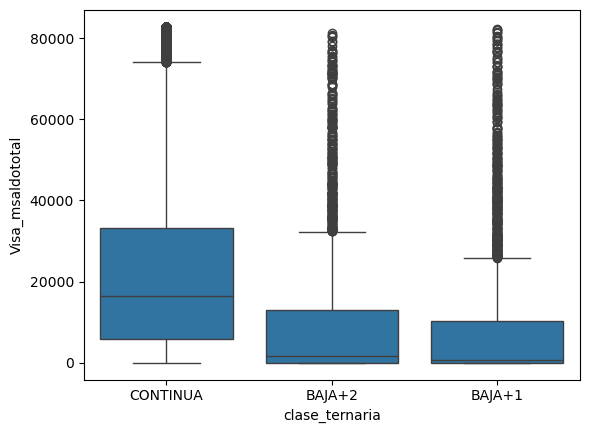

In [30]:
# Grafico.
lower_bound = data['Visa_msaldototal'].quantile(0.10)
upper_bound = data['Visa_msaldototal'].quantile(0.90)

filtered_data = data[(data['Visa_msaldototal'] >= lower_bound) & (data['Visa_msaldototal'] <= upper_bound)]
sns.boxplot(x='clase_ternaria', y='Visa_msaldototal', data=filtered_data)

In [ ]:
print(''' 
      El saldo total de la tarjeta, para el mes presente, es mucho mayor en los "CONTINUA".
      Por su lado, los "BAJA" presentan saldos más chicos, con expciones. ¿Esto puede ser
      un motivo de "BAJA"?
      ''')

##### 22. cliente_antiguedad.
**¿Qué significa?** Antiguedad medida en meses de el cliente.  Es de la ultima vez que esa persona reingresó como cliente del banco.

In [ ]:
# Grafico.
sns.boxplot(x='clase_ternaria', y='cliente_antiguedad', data=data)

In [ ]:
print('''
      Los "CONTINUA" suelen ser clientes un poco más antiguos. Los "BAJA" casi no se diferencian en su comportamiento.
      ''')

#### B. Análisis Univariado zoomeando la clase "BAJA+2".

In [5]:
#a. Filtro solamente "BAJA+2".
baja_1 = data[data["clase_ternaria"] == "BAJA+1"]
baja_2 = data[data["clase_ternaria"] == "BAJA+2"]
continua = data[data["clase_ternaria"] == "CONTINUA"]

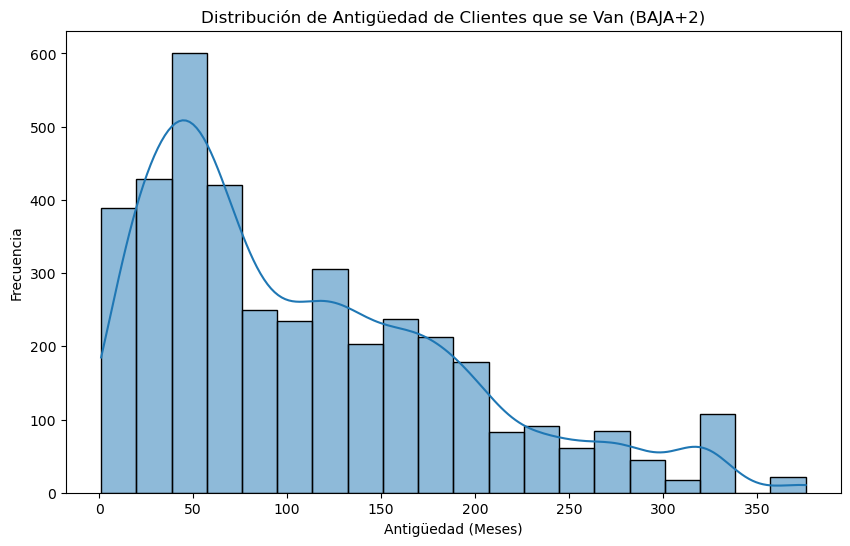

In [6]:
#b. Antigüedad de los clientes.
plt.figure(figsize=(10,6))
sns.histplot(baja_2['cliente_antiguedad'], bins=20, kde=True)
plt.title('Distribución de Antigüedad de Clientes BAJA+2')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Frecuencia')
plt.show()

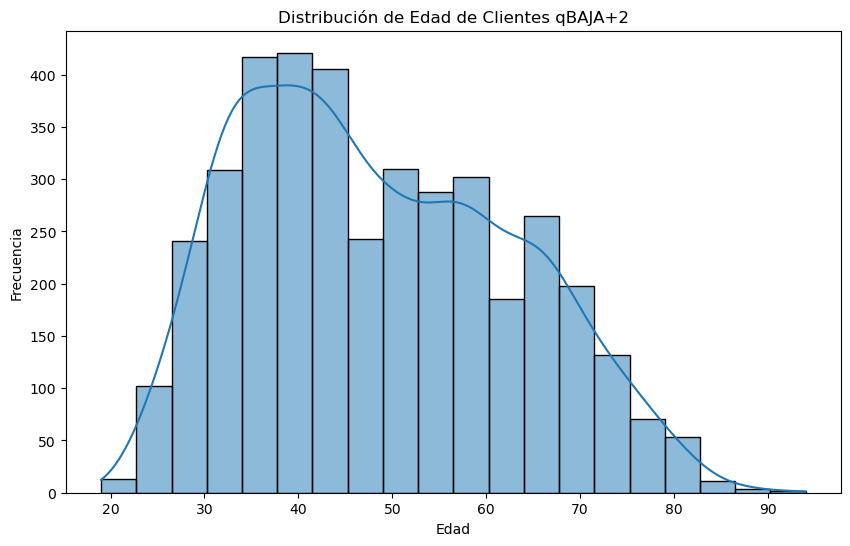

In [7]:
#c. Edad.
plt.figure(figsize=(10,6))
sns.histplot(baja_2['cliente_edad'], bins=20, kde=True)
plt.title('Distribución de Edad de Clientes qBAJA+2')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

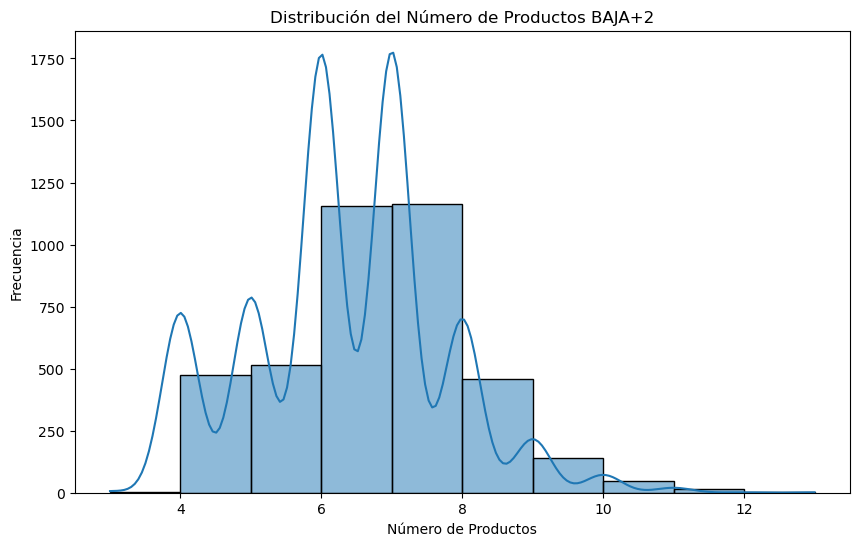

In [8]:
#d. Distribución del número de productos.
plt.figure(figsize=(10,6))
sns.histplot(baja_2['cproductos'], bins=10, kde=True)
plt.title('Distribución del Número de Productos BAJA+2')
plt.xlabel('Número de Productos')
plt.ylabel('Frecuencia')
plt.show()

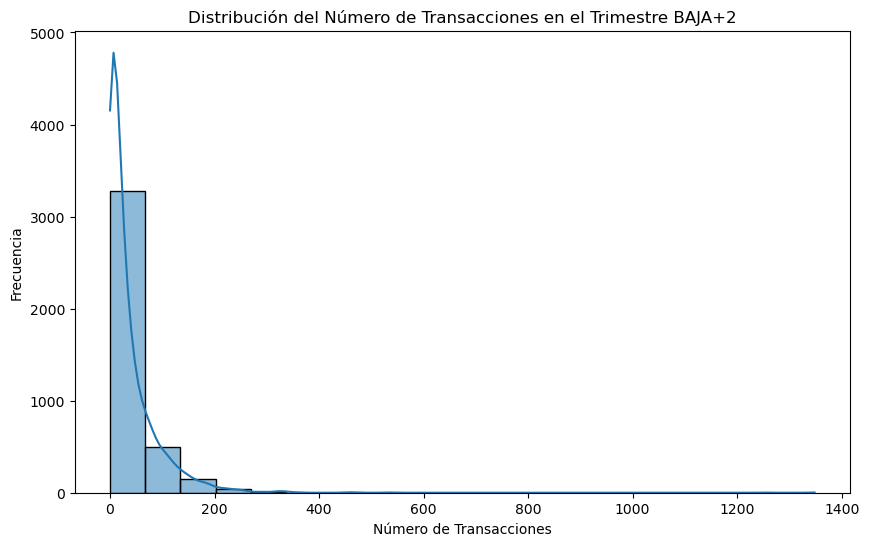

In [9]:
#e. Análisis del número de transacciones en el trimestre sin incluir Tarjeta de Crédito (ctrx_quarter).
plt.figure(figsize=(10,6))
sns.histplot(baja_2['ctrx_quarter'], bins=20, kde=True)
plt.title('Distribución del Número de Transacciones en el Trimestre BAJA+2')
plt.xlabel('Número de Transacciones')
plt.ylabel('Frecuencia')
plt.show()


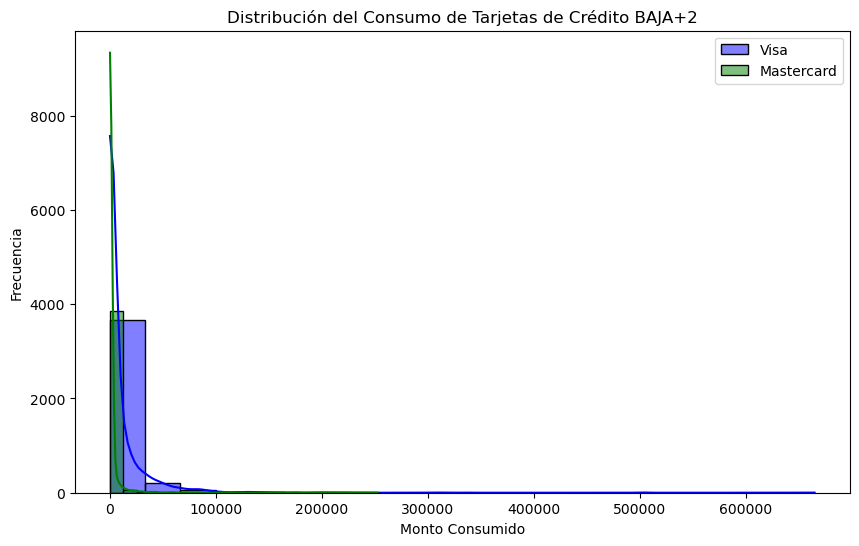

In [10]:
#f. Análisis de uso de tarjetas de crédito (consumos).
plt.figure(figsize=(10,6))
sns.histplot(baja_2['mtarjeta_visa_consumo'], bins=20, kde=True, color='blue', label='Visa')
sns.histplot(baja_2['mtarjeta_master_consumo'], bins=20, kde=True, color='green', label='Mastercard')
plt.title('Distribución del Consumo de Tarjetas de Crédito BAJA+2')
plt.xlabel('Monto Consumido')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

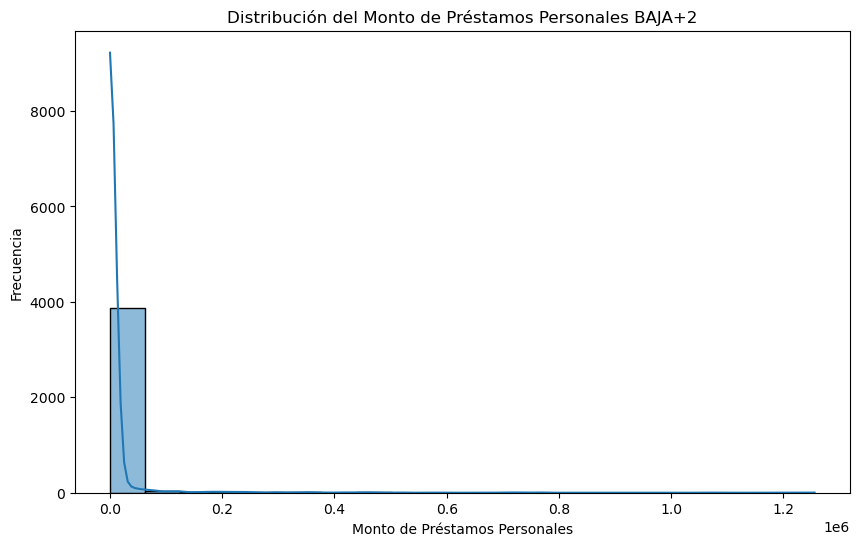

In [11]:
#g. Distribución de préstamos personales.
plt.figure(figsize=(10,6))
sns.histplot(baja_2['mprestamos_personales'], bins=20, kde=True)
plt.title('Distribución del Monto de Préstamos Personales BAJA+2')
plt.xlabel('Monto de Préstamos Personales')
plt.ylabel('Frecuencia')
plt.show()

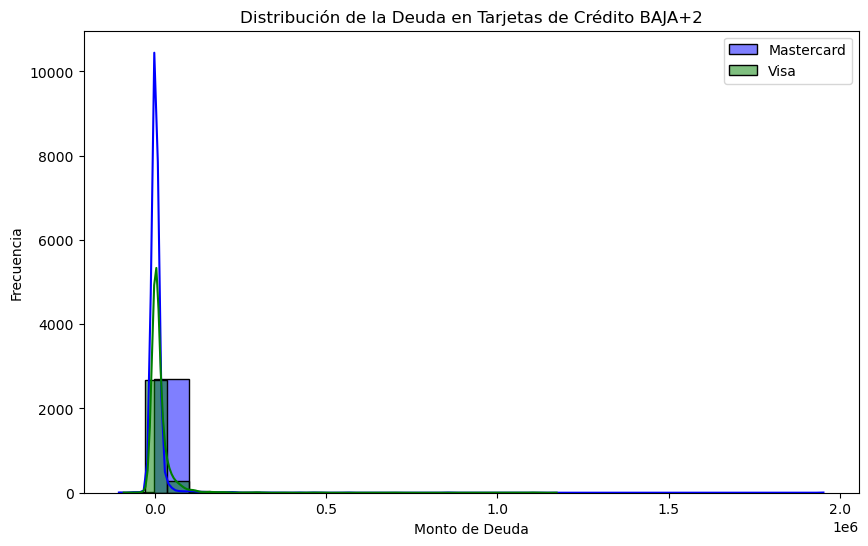

In [12]:
#h. Análisis de la deuda con tarjetas de crédito
plt.figure(figsize=(10,6))
sns.histplot(baja_2['Master_msaldototal'], bins=20, kde=True, color='blue', label='Mastercard')
sns.histplot(baja_2['Visa_msaldototal'], bins=20, kde=True, color='green', label='Visa')
plt.title('Distribución de la Deuda en Tarjetas de Crédito BAJA+2')
plt.xlabel('Monto de Deuda')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
# POSIBLES GRUPOS [PLANTEO DE HIPÓTESIS].
# Clientes nuevos que es dificil de retenerlos (ver antiguedad y cantidad de productos?)
# Clientes con poco uso de los productos que tienen (deberian tener pocos y pocos movimientos, poco saldos)
# Clientes que quizás usan los productos pero tienen poca satifacción (ver limite de la TC, comisiones)
# Clientes morosos que se van porque no pueden pagar (ver morosidad, deuda por TC, etc.)
# Clientes que dejaron de depositarle su sueldo allí- (quizas ver edad).

#### C. Análisis Multivariado dentro de la clase "BAJA+2" ----> En búsqueda de perfiles a su interior.

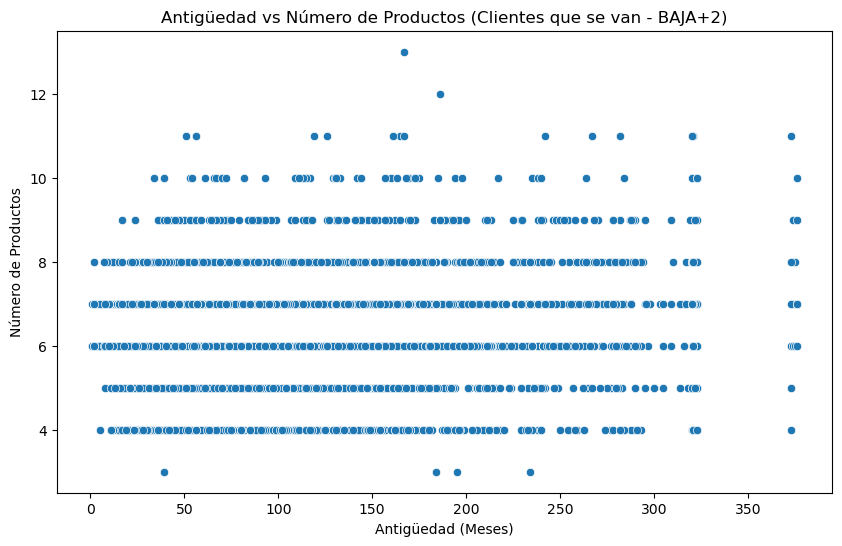

In [42]:
#i. Hipótesis clientes nuevos: Antigüedad vs Número de Productos
plt.figure(figsize=(10,6))
sns.scatterplot(x='cliente_antiguedad', y='cproductos', data=baja_2)
plt.title('Antigüedad vs Número de Productos')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Número de Productos')
plt.show()

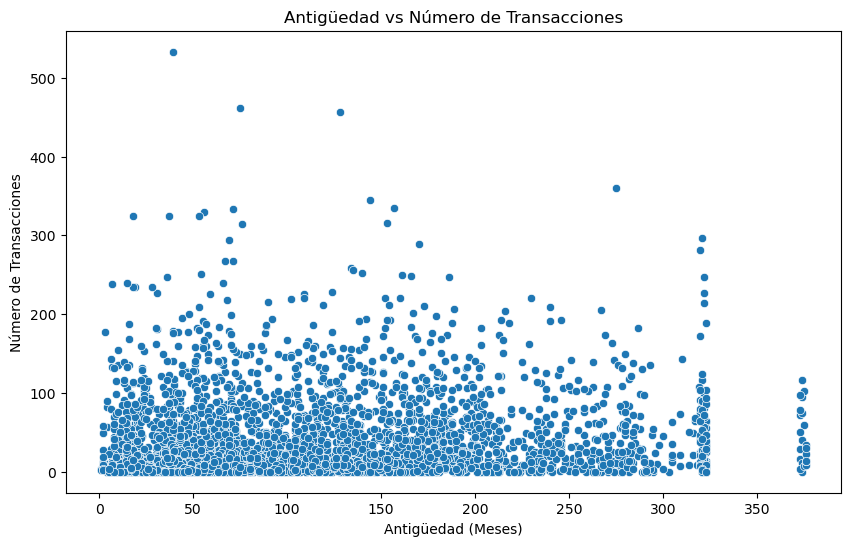

In [15]:
#i. Hipótesis clientes nuevos: Antigüedad vs Número de Transacciones
baja_2_filtrado = baja_2[baja_2["ctrx_quarter"]<600]
plt.figure(figsize=(10,6))
sns.scatterplot(x='cliente_antiguedad', y='ctrx_quarter', data=baja_2_filtrado)
plt.title('Antigüedad vs Número de Transacciones')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Número de Transacciones')
plt.show()

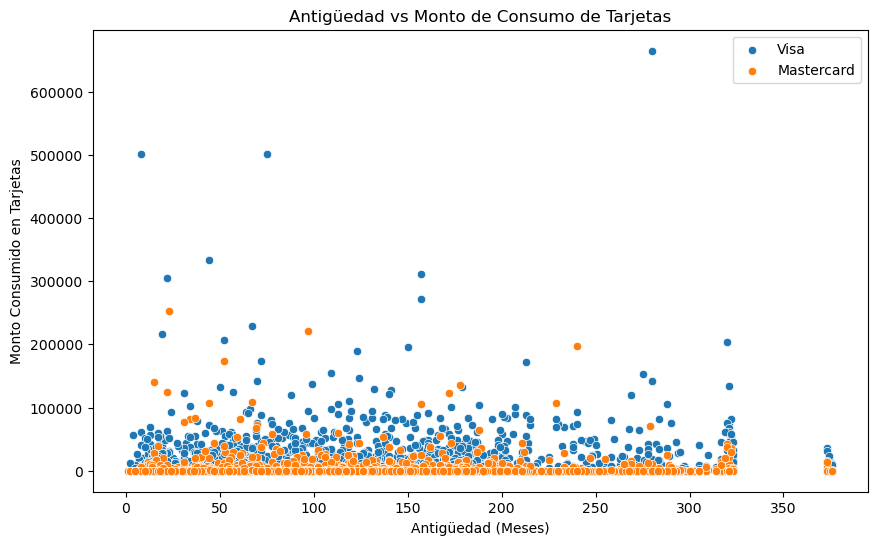

In [17]:
#i. Hipótesis clientes nuevos: Antigüedad vs Monto de Consumo de Tarjetas.
plt.figure(figsize=(10,6))
sns.scatterplot(x='cliente_antiguedad', y='mtarjeta_visa_consumo', data=baja_2, label='Visa')
sns.scatterplot(x='cliente_antiguedad', y='mtarjeta_master_consumo', data=baja_2, label='Mastercard')
plt.title('Antigüedad vs Monto de Consumo de Tarjetas')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Monto Consumido en Tarjetas')
plt.legend()
plt.show()

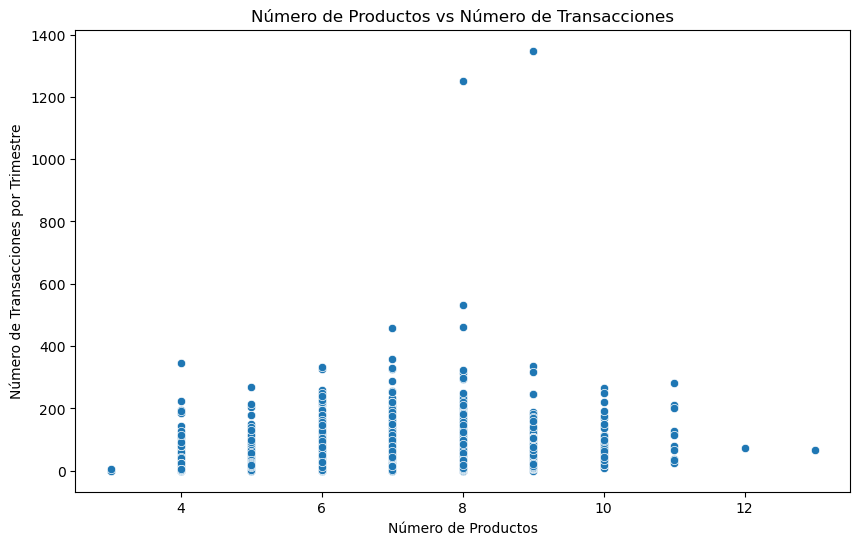

In [16]:
#ii. Hipótesis Clientes con poco uso de los productos que tienen: Número de Productos vs Número de Transacciones
plt.figure(figsize=(10,6))
sns.scatterplot(x='cproductos', y='ctrx_quarter', data=baja_2)
plt.title('Número de Productos vs Número de Transacciones')
plt.xlabel('Número de Productos')
plt.ylabel('Número de Transacciones por Trimestre')
plt.show()


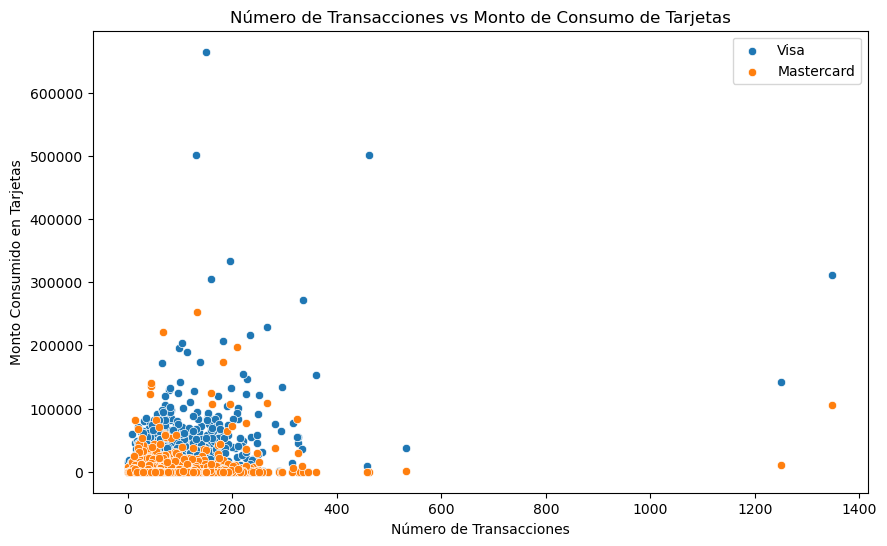

In [18]:
#ii. Hipótesis Clientes con poco uso de los productos que tienen: Número de Transacciones vs Monto de Consumo de Tarjetas.
plt.figure(figsize=(10,6))
sns.scatterplot(x='ctrx_quarter', y='mtarjeta_visa_consumo', data=baja_2, label='Visa')
sns.scatterplot(x='ctrx_quarter', y='mtarjeta_master_consumo', data=baja_2, label='Mastercard')
plt.title('Número de Transacciones vs Monto de Consumo de Tarjetas')
plt.xlabel('Número de Transacciones')
plt.ylabel('Monto Consumido en Tarjetas')
plt.legend()
plt.show()

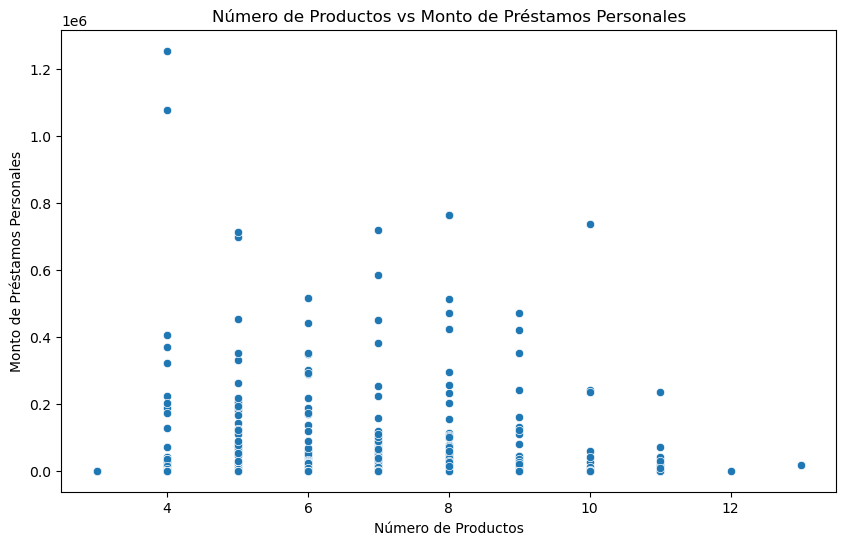

In [19]:
#ii. Hipótesis Clientes con poco uso de los productos que tienen: Número de Productos vs Monto de Préstamos Personales
plt.figure(figsize=(10,6))
sns.scatterplot(x='cproductos', y='mprestamos_personales', data=baja_2)
plt.title('Número de Productos vs Monto de Préstamos Personales')
plt.xlabel('Número de Productos')
plt.ylabel('Monto de Préstamos Personales')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


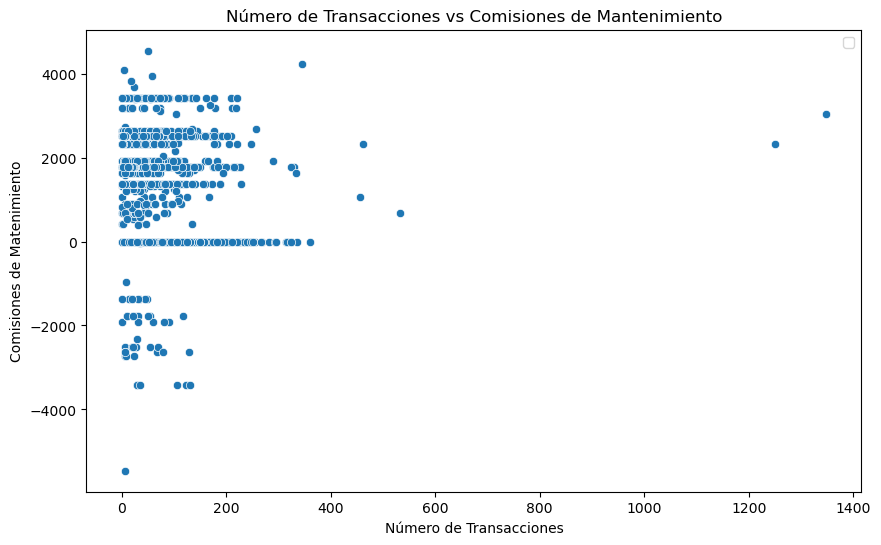

In [28]:
#iii. Hipótesis Clientes con poco uso de los productos que tienen: Cantidad de Transacciones vs Comisiones de Mantenimiento.
plt.figure(figsize=(10,6))
sns.scatterplot(x='ctrx_quarter', y='mcomisiones_mantenimiento', data=baja_2)
plt.title('Número de Transacciones vs Comisiones de Mantenimiento')
plt.xlabel('Número de Transacciones')
plt.ylabel('Comisiones de Matenimiento')
plt.legend()
plt.show()

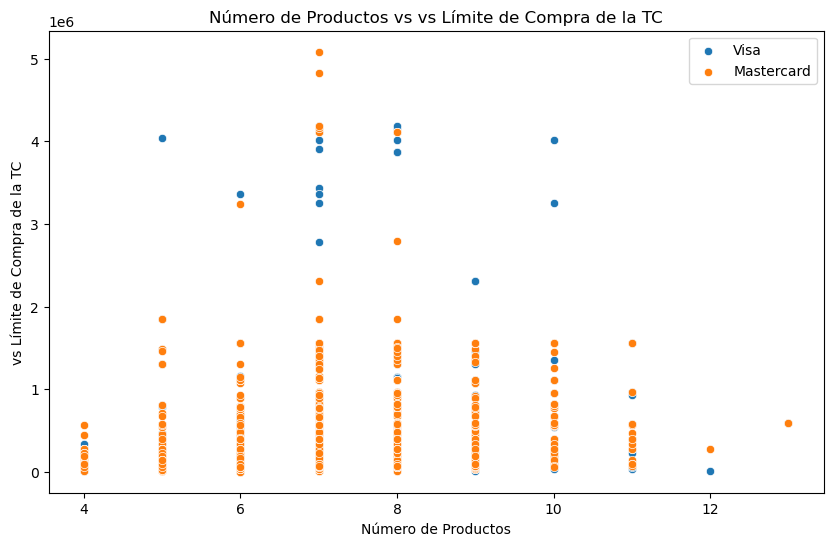

In [24]:
#iii. Clientes con uso de productos pero poca satifacción: Número de Productos vs Límite de la TC.
plt.figure(figsize=(10,6))
sns.scatterplot(x='cproductos', y='Master_mlimitecompra', data=baja_2, label='Visa')
sns.scatterplot(x='cproductos', y='Visa_mlimitecompra', data=baja_2, label='Mastercard')
plt.title('Número de Productos vs vs Límite de Compra de la TC')
plt.xlabel('Número de Productos')
plt.ylabel('vs Límite de Compra de la TC')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


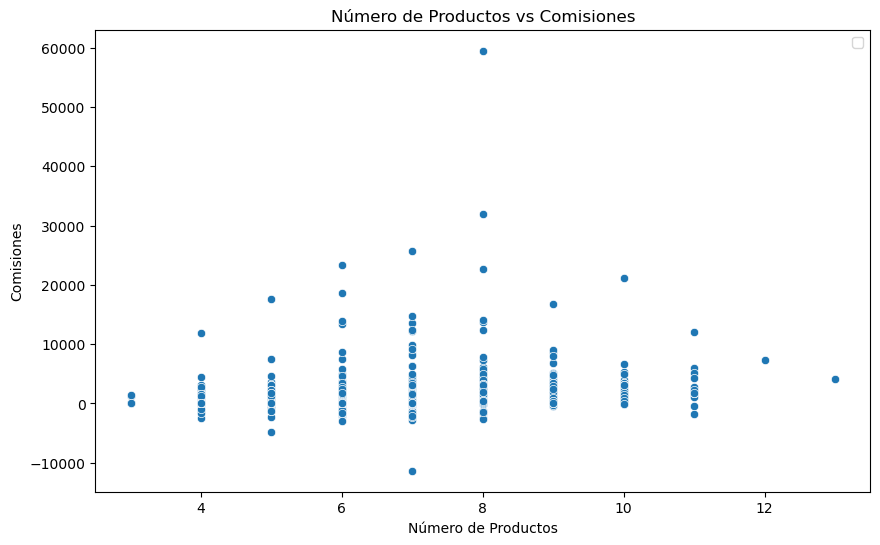

In [25]:
#iii. Clientes con uso de productos pero poca satifacción: Número de Productos vs Comisiones.
plt.figure(figsize=(10,6))
sns.scatterplot(x='cproductos', y='mcomisiones', data=baja_2)
plt.title('Número de Productos vs Comisiones')
plt.xlabel('Número de Productos')
plt.ylabel('Comisiones')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


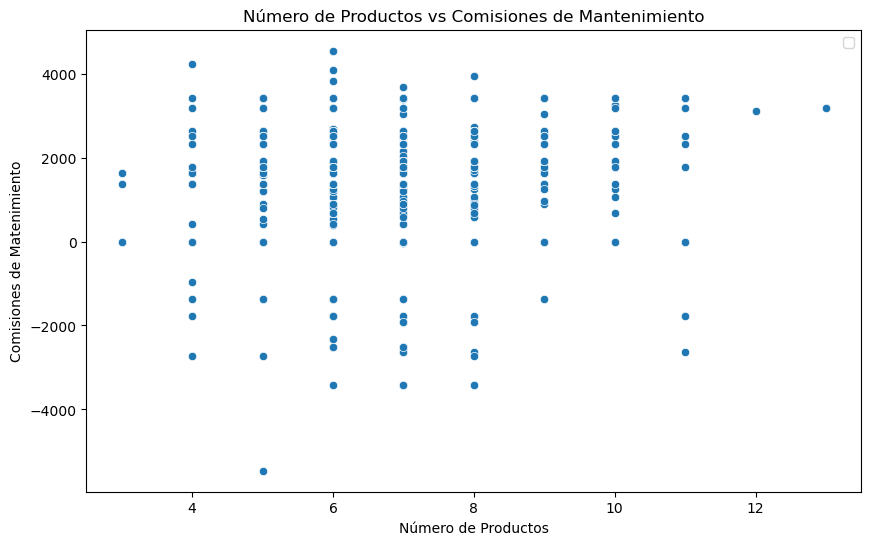

In [26]:
#iii. Clientes con uso de productos pero poca satifacción: Número de Productos vs Comisiones de Mantenimiento.
plt.figure(figsize=(10,6))
sns.scatterplot(x='cproductos', y='mcomisiones_mantenimiento', data=baja_2)
plt.title('Número de Productos vs Comisiones de Mantenimiento')
plt.xlabel('Número de Productos')
plt.ylabel('Comisiones de Matenimiento')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


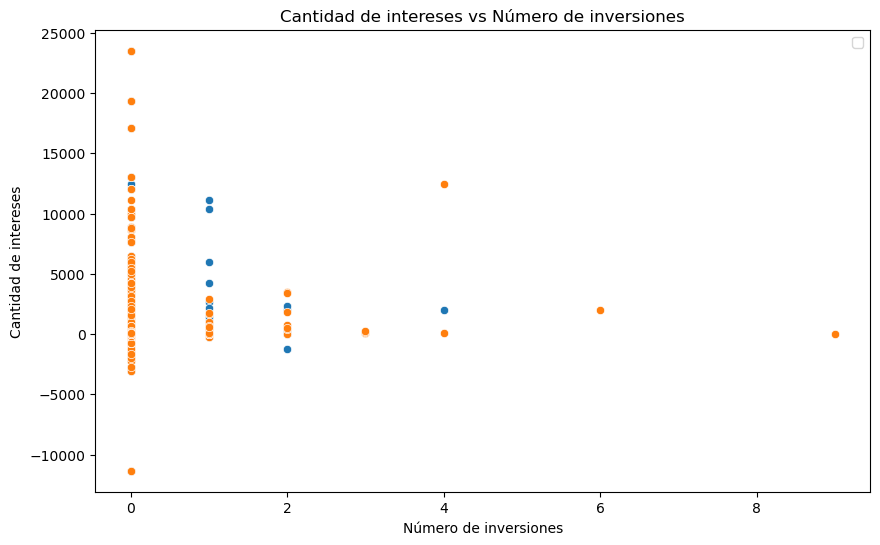

In [32]:
#iii. Clientes con uso de productos pero poca satifacción: Intereses del banco vs Cantidad de inversiones --> Muchos intereses y ni invierte.
plt.figure(figsize=(10,6))
sns.scatterplot(x='cinversion1',y='mpasivos_margen', data=baja_2)
sns.scatterplot(x='cinversion2',y='mpasivos_margen', data=baja_2)
plt.title('Cantidad de intereses vs Número de inversiones')
plt.xlabel('Número de inversiones')
plt.ylabel('Cantidad de intereses')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


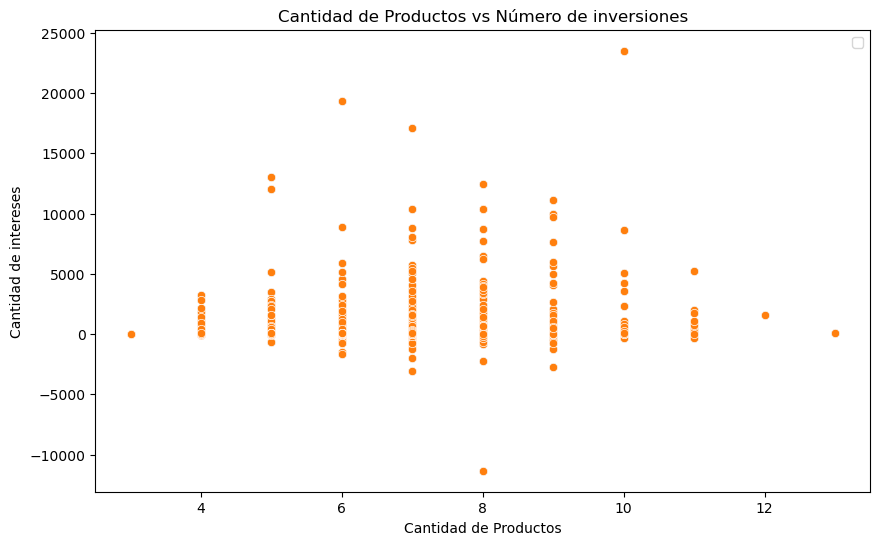

In [33]:
#iii. Clientes con uso de productos pero poca satifacción: Intereses del banco vs Número de productos --> Muchos intereses y pocos productos.
plt.figure(figsize=(10,6))
sns.scatterplot(x='cproductos',y='mpasivos_margen', data=baja_2)
sns.scatterplot(x='cproductos',y='mpasivos_margen', data=baja_2)
plt.title('Cantidad de Productos vs Número de inversiones')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Cantidad de intereses')
plt.legend()
plt.show()

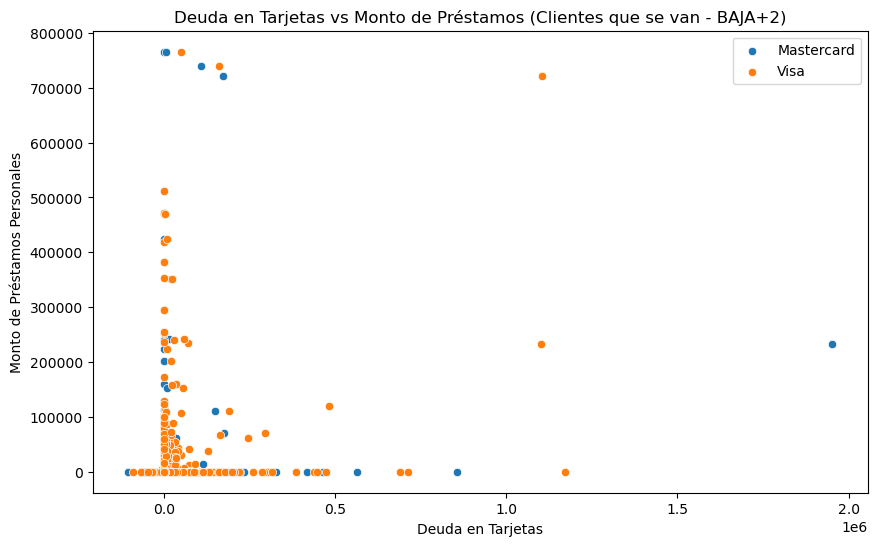

In [48]:
#iv. Hipótesis Morosos que no pueden pagar: Deuda en Tarjetas (Visa y Mastercard) vs Monto de Préstamos Personales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Master_msaldototal', y='mprestamos_personales', data=baja_2, label='Mastercard')
sns.scatterplot(x='Visa_msaldototal', y='mprestamos_personales', data=baja_2, label='Visa')
plt.title('Deuda en Tarjetas vs Monto de Préstamos')
plt.xlabel('Deuda en Tarjetas')
plt.ylabel('Monto de Préstamos Personales')
plt.legend()
plt.show()

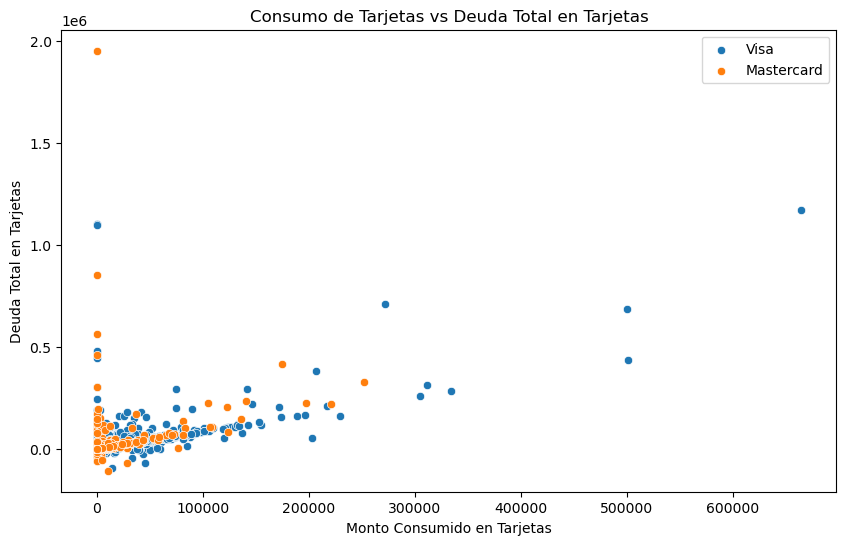

In [20]:
#iv. Hipótesis Morosos que no pueden pagar: Monto de Consumo en Tarjetas vs Deuda Total en Tarjetas
plt.figure(figsize=(10,6))
sns.scatterplot(x='mtarjeta_visa_consumo', y='Visa_msaldototal', data=baja_2, label='Visa')
sns.scatterplot(x='mtarjeta_master_consumo', y='Master_msaldototal', data=baja_2, label='Mastercard')
plt.title('Consumo de Tarjetas vs Deuda Total en Tarjetas')
plt.xlabel('Monto Consumido en Tarjetas')
plt.ylabel('Deuda Total en Tarjetas')
plt.legend()
plt.show()


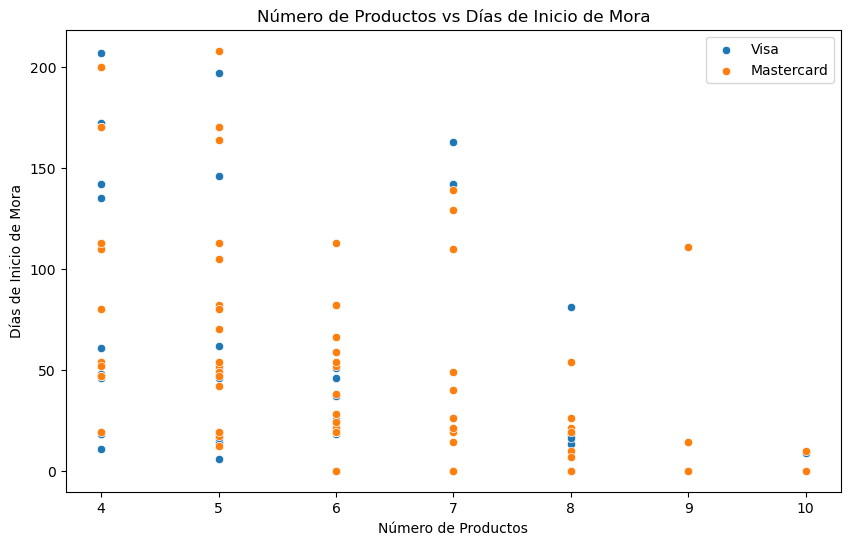

In [22]:
#iv.Hipótesis Morosos que no pueden pagar:Número de Productos vs ías de Inicio de Mora.
plt.figure(figsize=(10,6))
sns.scatterplot(x='cproductos', y='Master_Finiciomora', data=baja_2, label='Visa')
sns.scatterplot(x='cproductos', y='Visa_Finiciomora', data=baja_2, label='Mastercard')
plt.title('Número de Productos vs Días de Inicio de Mora')
plt.xlabel('Número de Productos')
plt.ylabel('Días de Inicio de Mora')
plt.legend()
plt.show()

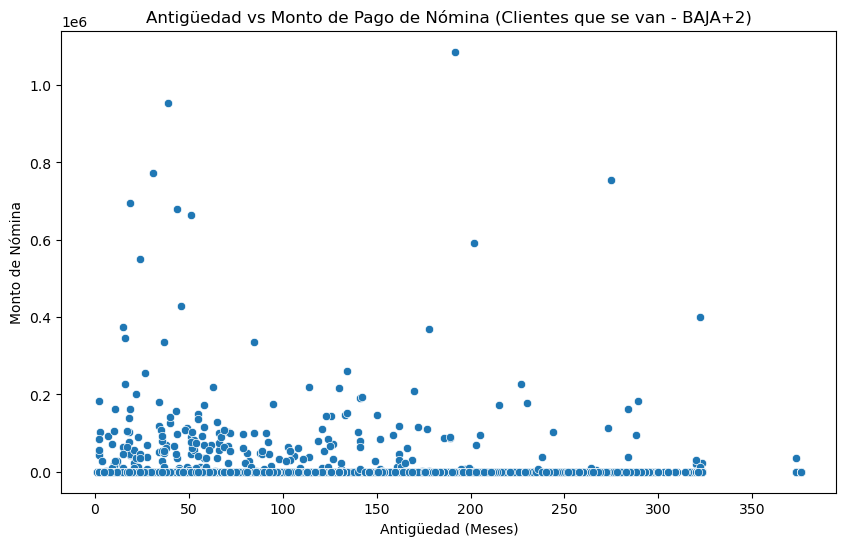

In [51]:
#v. Hipótesis Viejos Empleados: Antigüedad vs Monto de Sueldo.
plt.figure(figsize=(10,6))
sns.scatterplot(x='cliente_antiguedad', y='mpayroll', data=baja_2)
plt.title('Antigüedad vs Monto de Sueldo')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Monto de Sueldo')
plt.show()

#### D. Análisis de comportamientos temporales.

In [34]:
print('''Reforzando las hipótesis antes planteadas, agregar columnas que me permita rastrear....
      - Le depositaban el sueldo hasta "baja+2"->"baja+1"/el saldo de la caja de ahorros fue disminuyendo? (H5)
      - Le fue aumentando la mora por no pago hasta volverse insostenible? (H4)
      - Le fueron aumentando las comisiones hasta tener una percepción muy cara del producto? (H3)
      - El saldo de la TdeC (gasto) fue acercandose al límite? (H3)
      - Fue disminuyendo el uso de los productos bancarios (prestamos, transacciones, tarjetas,plazos fijos), el saldo de la TC? (H2)''')

Reforzando las hipótesis antes planteadas, agregar columnas que me permita rastrear....
      - Le depositaban el sueldo hasta "baja+2"->"baja+1"/el saldo de la caja de ahorros fue disminuyendo? (H5)
      - Le fue aumentando la mora por no pago hasta volverse insostenible? (H4)
      - Le fueron aumentando las comisiones hasta tener una percepción muy cara del producto? (H3)
      - El saldo de la TdeC (gasto) fue acercandose al límite? (H3)
      - Fue disminuyendo el uso de los productos bancarios (prestamos, transacciones, tarjetas,plazos fijos), el saldo de la TC? (H2)


In [35]:
# Importar df con las columnas temporales creadas.

#### E. Clusterización de los "BAJA+2"... Descubriendo subgrupos/insights.